In [28]:
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  precision_recall_curve,  roc_auc_score, roc_curve, recall_score
from sklearn.naive_bayes import GaussianNB

In [12]:
train=pd.read_csv('/home/vinay/Downloads/HDFC_ML/DataSet/Train.csv')
test=pd.read_csv('/home/vinay/Downloads/HDFC_ML/DataSet/Test.csv')

/home/vinay/anaconda3/envs/tensor/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (746,835) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/vinay/anaconda3/envs/tensor/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (700,731,740,752,761,789,811,820,829,841,850) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [13]:
trainobjects = train.select_dtypes(include=[object])
testobjects = test.select_dtypes(include=[object])
rcolumns=trainobjects+testobjects
#y=train['Col2']
train=train.drop(columns=rcolumns.columns)
#x=train
train.fillna(0, inplace=True)

In [14]:
testid=test['Col1']
test=test.drop(columns=rcolumns.columns)
test.fillna(0, inplace=True)

In [15]:
y=train['Col2']
train.drop('Col2', axis=1, inplace=True)
x=train

0    15760
1     1761
Name: Col2, dtype: int64


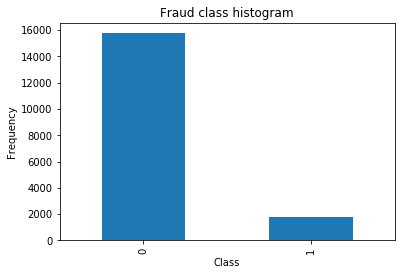

In [17]:
pd.value_counts(y).plot.bar()
plt.title('Fraud class histogram')
plt.xlabel('Class')
plt.ylabel('Frequency')
print(y.value_counts())

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25,stratify=y) # 70% training and 30% test

In [21]:
print("Number transactions X_train dataset: ", x_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", x_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
x_train_res, y_train_res = sm.fit_sample(x_train, y_train)

print('After OverSampling, the shape of train_X: {}'.format(x_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Number transactions X_train dataset:  (13140, 2380)
Number transactions y_train dataset:  (13140,)
Number transactions X_test dataset:  (4381, 2380)
Number transactions y_test dataset:  (4381,)
Before OverSampling, counts of label '1': 1321
Before OverSampling, counts of label '0': 11819 

After OverSampling, the shape of train_X: (23638, 2380)
After OverSampling, the shape of train_y: (23638,) 

After OverSampling, counts of label '1': 11819
After OverSampling, counts of label '0': 11819


In [73]:
#parameters = {
 #   'C': np.linspace(1, 10, 10),'penalty':['l1','l2']
     #        }
#lr = LogisticRegression(n_jobs=-1)
#clf = RandomizedSearchCV(lr, parameters, cv=3, verbose=10, n_jobs=-1,n_iter=5)
clf = GaussianNB()
#priors=[0.95,0.05]
clf.fit(x, y)
print(clf.class_prior_)
print(clf.class_count_)

[0.89949204 0.10050796]
[15760.  1761.]


In [74]:
y_pred=clf.predict(x_test)

In [75]:
print("Accuracy:",accuracy_score(y_test, y_pred))
print("precision_recall_fscore_support:",precision_recall_fscore_support(y_test,y_pred,average='macro'))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
print("auc   :",auc(false_positive_rate, true_positive_rate))
y_pred_prob=clf.predict_proba(x_test)
y_prob = [p[1] for p in y_pred_prob]
print( "roc_auc_score  :",roc_auc_score(y_test, y_prob))

Accuracy: 0.21433462679753482
precision_recall_fscore_support: (0.5180615783529985, 0.5229291135152592, 0.21354293141071373, None)
              precision    recall  f1-score   support

           0       0.93      0.14      0.24      3941
           1       0.11      0.91      0.19       440

    accuracy                           0.21      4381
   macro avg       0.52      0.52      0.21      4381
weighted avg       0.85      0.21      0.23      4381

[[ 539 3402]
 [  40  400]]
auc   : 0.5229291135152592
roc_auc_score  : 0.6029220779220779


In [76]:
result=clf.predict(test)
unique, counts = np.unique(result, return_counts=True)
print (np.asarray((unique, counts)).T)

[[    0  2758]
 [    1 17684]]


In [ ]:
predictions=np.asarray([testid,result])
predictions=predictions.T
df=pd.DataFrame(predictions,columns=['Col1','Col2'])
df.to_csv("/home/vinay/Downloads/HDFC_ML/DataSet/PredictionstrainGNB1.csv",index=False)